In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [222]:
def CreatePoints(n_variables,n_samples):
    X=np.ones((n_samples,n_variables))
    for _ in range (n_variables):
       x_ = np.arange(n_samples)
       X[:,_] = x_
    print(X)
    m=np.random.uniform(1,15,size=[n_variables])
    b=np.random.randint(n_samples)
    print(m@X.T)
    Y = ((m@X.T)+b)
    Y = Y + np.random.normal(0,0.5)
    return X,Y
X,Y=CreatePoints(3,100)

[[ 0.  0.  0.]
 [ 1.  1.  1.]
 [ 2.  2.  2.]
 [ 3.  3.  3.]
 [ 4.  4.  4.]
 [ 5.  5.  5.]
 [ 6.  6.  6.]
 [ 7.  7.  7.]
 [ 8.  8.  8.]
 [ 9.  9.  9.]
 [10. 10. 10.]
 [11. 11. 11.]
 [12. 12. 12.]
 [13. 13. 13.]
 [14. 14. 14.]
 [15. 15. 15.]
 [16. 16. 16.]
 [17. 17. 17.]
 [18. 18. 18.]
 [19. 19. 19.]
 [20. 20. 20.]
 [21. 21. 21.]
 [22. 22. 22.]
 [23. 23. 23.]
 [24. 24. 24.]
 [25. 25. 25.]
 [26. 26. 26.]
 [27. 27. 27.]
 [28. 28. 28.]
 [29. 29. 29.]
 [30. 30. 30.]
 [31. 31. 31.]
 [32. 32. 32.]
 [33. 33. 33.]
 [34. 34. 34.]
 [35. 35. 35.]
 [36. 36. 36.]
 [37. 37. 37.]
 [38. 38. 38.]
 [39. 39. 39.]
 [40. 40. 40.]
 [41. 41. 41.]
 [42. 42. 42.]
 [43. 43. 43.]
 [44. 44. 44.]
 [45. 45. 45.]
 [46. 46. 46.]
 [47. 47. 47.]
 [48. 48. 48.]
 [49. 49. 49.]
 [50. 50. 50.]
 [51. 51. 51.]
 [52. 52. 52.]
 [53. 53. 53.]
 [54. 54. 54.]
 [55. 55. 55.]
 [56. 56. 56.]
 [57. 57. 57.]
 [58. 58. 58.]
 [59. 59. 59.]
 [60. 60. 60.]
 [61. 61. 61.]
 [62. 62. 62.]
 [63. 63. 63.]
 [64. 64. 64.]
 [65. 65. 65.]
 [66. 66. 

In [224]:
print(Y)

[  66.61140701  103.1882089   139.76501078  176.34181267  212.91861456
  249.49541645  286.07221833  322.64902022  359.22582211  395.802624
  432.37942588  468.95622777  505.53302966  542.10983155  578.68663344
  615.26343532  651.84023721  688.4170391   724.99384099  761.57064287
  798.14744476  834.72424665  871.30104854  907.87785043  944.45465231
  981.0314542  1017.60825609 1054.18505798 1090.76185986 1127.33866175
 1163.91546364 1200.49226553 1237.06906741 1273.6458693  1310.22267119
 1346.79947308 1383.37627497 1419.95307685 1456.52987874 1493.10668063
 1529.68348252 1566.2602844  1602.83708629 1639.41388818 1675.99069007
 1712.56749196 1749.14429384 1785.72109573 1822.29789762 1858.87469951
 1895.45150139 1932.02830328 1968.60510517 2005.18190706 2041.75870895
 2078.33551083 2114.91231272 2151.48911461 2188.0659165  2224.64271838
 2261.21952027 2297.79632216 2334.37312405 2370.94992593 2407.52672782
 2444.10352971 2480.6803316  2517.25713349 2553.83393537 2590.41073726
 2626.98

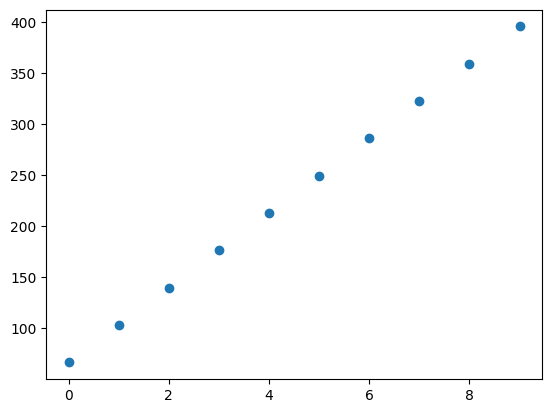

In [225]:
def ShowTendency(X,Y):
    plt.scatter(X[:10,0],Y[:10])
    plt.show()
ShowTendency(X,Y)

In [ ]:
def LinearRegression(X,Y):
    